In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
# For handling string
import string
import spacy
# For visualizations
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
stopwords = list(STOP_WORDS)

from heapq import nlargest
punctuation = punctuation + '\n'

#loading the dataset

In [ ]:
#reading the data
df = pd.read_csv('/content/Symptom2Disease.csv')

In [ ]:
df.head()

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [ ]:
df.shape

(1200, 3)

In [ ]:
#removing the unnecessary column
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.head()

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."


In [ ]:
df.shape

(1200, 2)

In [ ]:
#checking if there is any null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1200 non-null   object
 1   text    1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


In [ ]:
original_text = []
for index, row in df.iterrows():
    original_text.append(row['text'])

df = df.assign(Original_text = original_text)

df.head()

,label,text,Original_text
0,Psoriasis,I have been experiencing a skin rash on my arm...,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne...","My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp...","There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and...","My nails have small dents or pits in them, and..."


In [ ]:
df.nunique()

label              24
text             1153
Original_text    1153
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   label          1153 non-null   object
 1   text           1153 non-null   object
 2   Original_text  1153 non-null   object
dtypes: object(3)
memory usage: 36.0+ KB


#Preprocessing the text data

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [ ]:
# Expanding Contractions in the reviews
df['text']=df['text'].apply(lambda x:expand_contractions(x))

# change all text to lower case
df['text']=df['text'].apply(lambda x: x.lower())

# remove punctuations
df['text']=df['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# Lemmatization with stopwords removal
df['text']=df['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

df.head()

,label,text,Original_text
0,Psoriasis,experience skin rash arm leg torso past week r...,I have been experiencing a skin rash on my arm...
1,Psoriasis,skin peel especially knee elbow scalp peeling ...,"My skin has been peeling, especially on my kne..."
2,Psoriasis,experience joint pain finger wrist knee pain a...,I have been experiencing joint pain in my fing...
3,Psoriasis,silver like dust skin especially low scalp dus...,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,nail small dent pit feel inflammatory tender t...,"My nails have small dents or pits in them, and..."


In [ ]:

#categorical encoding of labels
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["label_no"]=lb.fit_transform(df["label"])
df.head()


,label,text,Original_text,label_no
0,Psoriasis,experience skin rash arm leg torso past week r...,I have been experiencing a skin rash on my arm...,15
1,Psoriasis,skin peel especially knee elbow scalp peeling ...,"My skin has been peeling, especially on my kne...",15
2,Psoriasis,experience joint pain finger wrist knee pain a...,I have been experiencing joint pain in my fing...,15
3,Psoriasis,silver like dust skin especially low scalp dus...,"There is a silver like dusting on my skin, esp...",15
4,Psoriasis,nail small dent pit feel inflammatory tender t...,"My nails have small dents or pits in them, and...",15


#Train test Splitting

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label_no"], test_size=0.2, random_state=42)



In [ ]:
vectorizer = TfidfVectorizer(max_features=1500)

X_train_v = vectorizer.fit_transform(X_train).toarray()
X_test_v = vectorizer.transform(X_test).toarray()

# Using Decision Tree Claasifier

In [ ]:
#creating model for the classification
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', max_depth=24, random_state=0)
dtc.fit(X_train_v, y_train)

DecisionTreeClassifier(max_depth=24, random_state=0)

In [ ]:
y_pred = dtc.predict(X_test_v)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

def report(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.subplots(figsize=(12,12))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

Accuracy: 0.73
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.82      0.90      0.86        10
           3       1.00      0.91      0.95        11
           4       0.33      0.38      0.35         8
           5       0.89      0.73      0.80        11
           6       0.44      0.36      0.40        11
           7       1.00      1.00      1.00         9
           8       1.00      0.75      0.86        12
           9       1.00      0.89      0.94         9
          10       1.00      0.82      0.90        11
          11       1.00      1.00      1.00         8
          12       1.00      0.86      0.92         7
          13       1.00      0.86      0.92         7
          14       0.90      0.82      0.86        11
          15       0.62      0.56      0.59         9
          16       0.78      0.70      0.74        10
          17

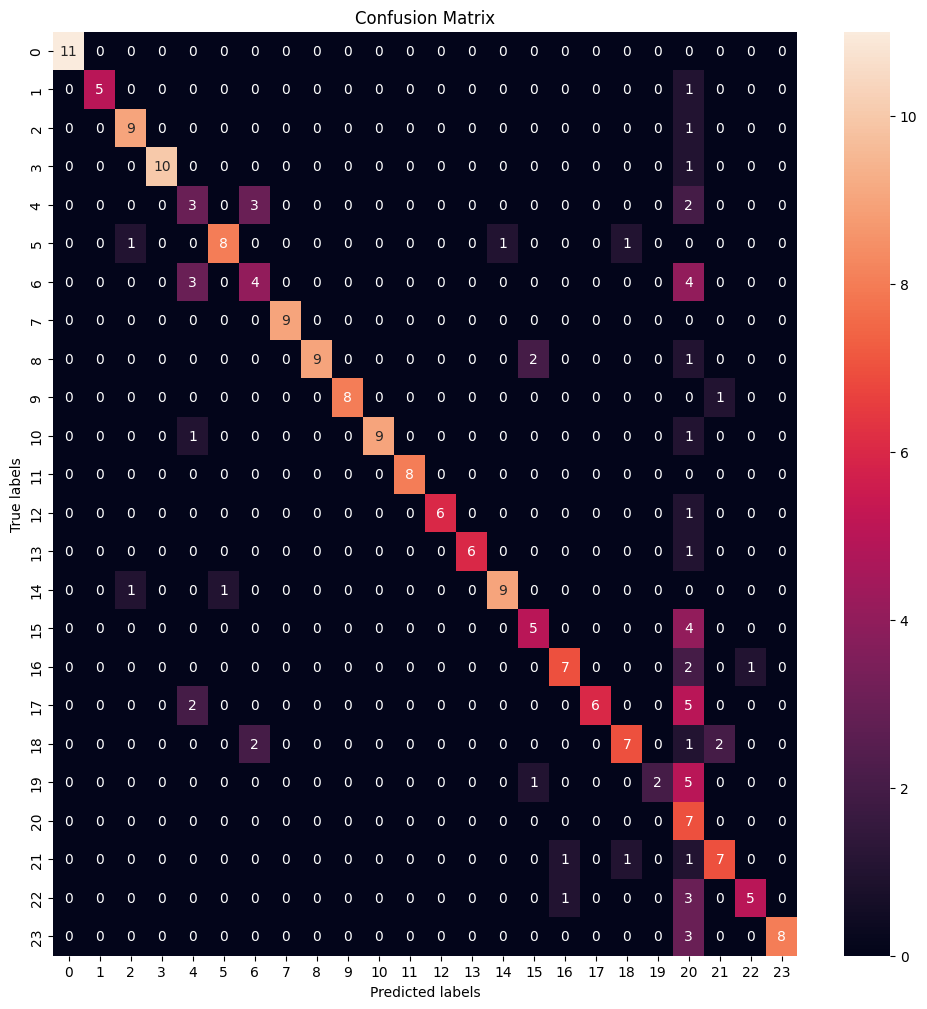

In [ ]:
report(y_test,y_pred)

In [ ]:
# getting prediction on random text
# modification has been done on the original text and getting the prediction after modification
sent1 = 'These fractures hurt and bleed frequently. The fractures are itchy and covered with scales. My fingers and soles have pretty thick skin that is cracked severely' # Psoriasis
sent2 = 'I am feeling sick. I have a fever and headache. I noticed rashes on my arms and face. I am worried about this. I observed red sores near my nose.' # Impetigo
sent3 = 'I have a rash on my legs that is causing discomforts. There is a cramp and I can see prominent veins on the calf. I have been feeling very tired and fatigued in the past couple of days.' # Varicose Veins

text = [sent1, sent2, sent3]

#preprocessign the text before testing
# Expanding Contractions in the reviews
text = list(map(lambda x: expand_contractions(x), text))

# change all text to lower case
text = list(map(lambda x: x.lower(), text))

# remove punctuations
text = list(map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x), text))

# Lemmatization with stopwords removal
text = list(map(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]), text))

newtest_v = vectorizer.transform(text).toarray()

y_pred = dtc.predict(newtest_v)


print(y_pred)
print(lb.inverse_transform(y_pred))


[20 10 17]
['drug reaction' 'Impetigo' 'Varicose Veins']


# Using SVM model

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1).fit(X_train_v, y_train)
svm_pred = svm.predict(X_test_v)

Accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        11
           4       0.57      1.00      0.73         8
           5       0.92      1.00      0.96        11
           6       0.88      0.64      0.74        11
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00        12
           9       0.90      1.00      0.95         9
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00        11
          15       1.00      0.89      0.94         9
          16       1.00      0.90      0.95        10
          17

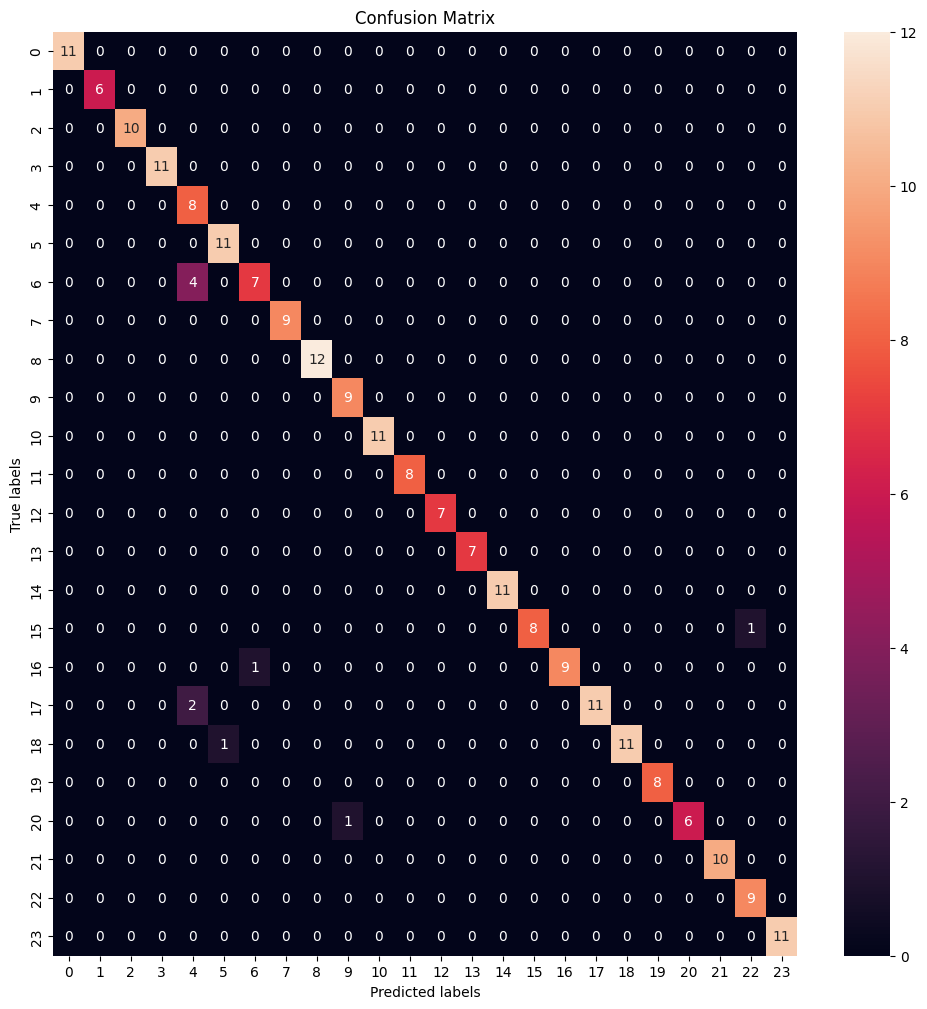

In [ ]:
report(y_test,svm_pred)

In [ ]:
# getting prediction on random text
# modification has been done on the original text and getting the prediction after modification
sent1 = 'These fractures hurt and bleed frequently. The fractures are itchy and covered with scales. My fingers and soles have pretty thick skin that is cracked severely' # Psoriasis
sent2 = 'I am feeling sick. I have a fever and headache. I noticed rashes on my arms and face. I am worried about this. I observed red sores near my nose.' # Impetigo
sent3 = 'I have a rash on my legs that is causing discomforts. There is a cramp and I can see prominent veins on the calf. I have been feeling very tired and fatigued in the past couple of days.' # Varicose Veins

text = [sent1, sent2, sent3]

#preprocessign the text before testing
# Expanding Contractions in the reviews
text = list(map(lambda x: expand_contractions(x), text))

# change all text to lower case
text = list(map(lambda x: x.lower(), text))

# remove punctuations
text = list(map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x), text))

# Lemmatization with stopwords removal
text = list(map(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]), text))

newtest_v = vectorizer.transform(text).toarray()

y_pred = svm.predict(newtest_v)


print(y_pred)
print(lb.inverse_transform(y_pred))


[15 10 17]
['Psoriasis' 'Impetigo' 'Varicose Veins']


# Use of summarized text as test data and predicting the result

In [ ]:
# Here we upload the summarized data which we get from summarization in another file (from fine tuning file)
newDf = pd.read_csv('/content/summary.csv')

In [ ]:
newDf.head()

,Unnamed: 0,label,label_int,text,Original_text,summary_original
0,0,Psoriasis,15,experience skin rash arm leg torso past week r...,I have been experiencing a skin rash on my arm...,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,15,skin palm sol thicken deep crack crack painful...,The skin on my palms and soles is thickened an...,I have noticed a sudden peeling of skin at dif...
2,2,Psoriasis,15,experience fatigue general feeling malaise fee...,I have experienced fatigue and a general feeli...,The rash on my skin is worse in the winter mon...
3,3,Psoriasis,15,start rash skin rash bleed scratch rub notice ...,I am starting to have rashes on my skin. The r...,"Also, I have noticed strange peeling of skin i..."
4,4,Psoriasis,15,rash skin heal notice sudden peeling skin espe...,The rashes on my skin are not healing. Moreove...,"Moreover, I have noticed a sudden peeling of t..."


In [ ]:
newDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        247 non-null    int64 
 1   label             247 non-null    object
 2   label_int         247 non-null    int64 
 3   text              247 non-null    object
 4   Original_text     247 non-null    object
 5   summary_original  238 non-null    object
dtypes: int64(2), object(4)
memory usage: 11.7+ KB


In [ ]:
newDf.drop(['Unnamed: 0'],axis=1, inplace=True)
newDf.head()

,label,label_int,text,Original_text,summary_original
0,Psoriasis,15,experience skin rash arm leg torso past week r...,I have been experiencing a skin rash on my arm...,I have been experiencing a skin rash on my arm...
1,Psoriasis,15,skin palm sol thicken deep crack crack painful...,The skin on my palms and soles is thickened an...,I have noticed a sudden peeling of skin at dif...
2,Psoriasis,15,experience fatigue general feeling malaise fee...,I have experienced fatigue and a general feeli...,The rash on my skin is worse in the winter mon...
3,Psoriasis,15,start rash skin rash bleed scratch rub notice ...,I am starting to have rashes on my skin. The r...,"Also, I have noticed strange peeling of skin i..."
4,Psoriasis,15,rash skin heal notice sudden peeling skin espe...,The rashes on my skin are not healing. Moreove...,"Moreover, I have noticed a sudden peeling of t..."


In [ ]:
newDf["summary_original"] = newDf["summary_original"].apply(lambda x: str(x))

In [ ]:
# Expanding Contractions in the reviews
newDf['summary_original']=newDf['summary_original'].apply(lambda x:expand_contractions(x))

# change all text to lower case
newDf['summary_original']=newDf['summary_original'].apply(lambda x: x.lower())

# remove punctuations
newDf['summary_original']=newDf['summary_original'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# Lemmatization with stopwords removal
newDf['summary_original']=newDf['summary_original'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

newDf.head()

,label,label_int,text,Original_text,summary_original
0,Psoriasis,15,experience skin rash arm leg torso past week r...,I have been experiencing a skin rash on my arm...,experience skin rash arm leg torso past week s...
1,Psoriasis,15,skin palm sol thicken deep crack crack painful...,The skin on my palms and soles is thickened an...,notice sudden peeling skin different part body...
2,Psoriasis,15,experience fatigue general feeling malaise fee...,I have experienced fatigue and a general feeli...,rash skin bad winter month air dry rash skin s...
3,Psoriasis,15,start rash skin rash bleed scratch rub notice ...,I am starting to have rashes on my skin. The r...,notice strange peeling skin different part bod...
4,Psoriasis,15,rash skin heal notice sudden peeling skin espe...,The rashes on my skin are not healing. Moreove...,notice sudden peeling skin especially skin elb...


In [ ]:
newDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   label             247 non-null    object
 1   label_int         247 non-null    int64 
 2   text              247 non-null    object
 3   Original_text     247 non-null    object
 4   summary_original  247 non-null    object
dtypes: int64(1), object(4)
memory usage: 9.8+ KB


In [ ]:
# actual values
print ("Actual values")
print (f"{newDf.iloc[1]['label']}, {newDf.iloc[10]['label']}, {newDf.iloc[75]['label']}, {newDf.iloc[11]['label']}, {newDf.iloc[49]['label']}, {newDf.iloc[105]['label']}")


Actual values
Psoriasis, Varicose Veins, Common Cold, Varicose Veins, Impetigo, Arthritis


In [ ]:
print ("Predicted values")
text = [newDf.iloc[1]['summary_original'], newDf.iloc[10]['summary_original'], newDf.iloc[75]['summary_original'], newDf.iloc[11]['summary_original'], newDf.iloc[49]['summary_original'], newDf.iloc[105]['summary_original']]

newtest_v = vectorizer.transform(text).toarray()


#using decision tree classifier model to predict
y_pred = dtc.predict(newtest_v)


print(y_pred)
print(lb.inverse_transform(y_pred))

Predicted values
[15 17  5 17 10  1]
['Psoriasis' 'Varicose Veins' 'Common Cold' 'Varicose Veins' 'Impetigo'
 'Arthritis']


In [ ]:
#predicting for all the summarized text through decision tree model

test_summarized_v = vectorizer.transform(newDf['summary_original']).toarray()

y_pred_dtc = dtc.predict(test_summarized_v)
print(y_pred_dtc)

y_test_dtc= newDf['label_int'].tolist()


[15 15 15 15 15 15 15 15 15 15 17 17 17 17 17 17 17 17 17 17 23 16 16 16
 16 16 23 23 16 16 20 20  8 20  4  4 20 20  4 20 20 10 10 10 10 10 10 10
 10 10 10 20  6  6 20 20  4  6  6  6  6  6 20  8  8  8 20  8  8  8  8  8
  8 20  5  5  5  5  5  5  2  5 18  5  5 14 14 14 14  5 14  5  5  5  7  7
  7  7  7 16 20  7 20  3  1  1  1  1  1  1 20  1 20 15  0  0  0 15  0  0
  0  0 15  5  2  2  2  2  2  2  2  5  2 20  9  9  9  9  9  9  9  9  9  9
  9 20 13 13 13 13 13 13 13 13 13 20 20 20  2  2  2  2  3  3  3  2 10 11
 10 11 11 11 11 23 20 12 20 20 20 12 12 20 20 20 23 23 23 20 20 23 20 23
 23 23 18 18 18  5 18 18 18 18 18 18 21 21 21 20 21 21 21 21 21 20  6 20
 20 15 20 19 20 20 20 19 20 20 22 22 21 22  5 22  5 22  5 16 19 19  2 15
 19 19  5 15 19 19 14]


Accuracy: 0.69
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       1.00      0.70      0.82        10
           2       0.53      0.73      0.62        11
           3       0.75      0.27      0.40        11
           4       0.75      0.30      0.43        10
           5       0.40      0.73      0.52        11
           6       0.88      0.64      0.74        11
           7       1.00      0.67      0.80         9
           8       0.90      0.82      0.86        11
           9       1.00      1.00      1.00        11
          10       0.83      0.91      0.87        11
          11       1.00      0.56      0.71         9
          12       1.00      0.33      0.50         9
          13       1.00      0.90      0.95        10
          14       0.83      0.50      0.62        10
          15       0.62      1.00      0.77        10
          16       0.78      0.70      0.74        10
          17

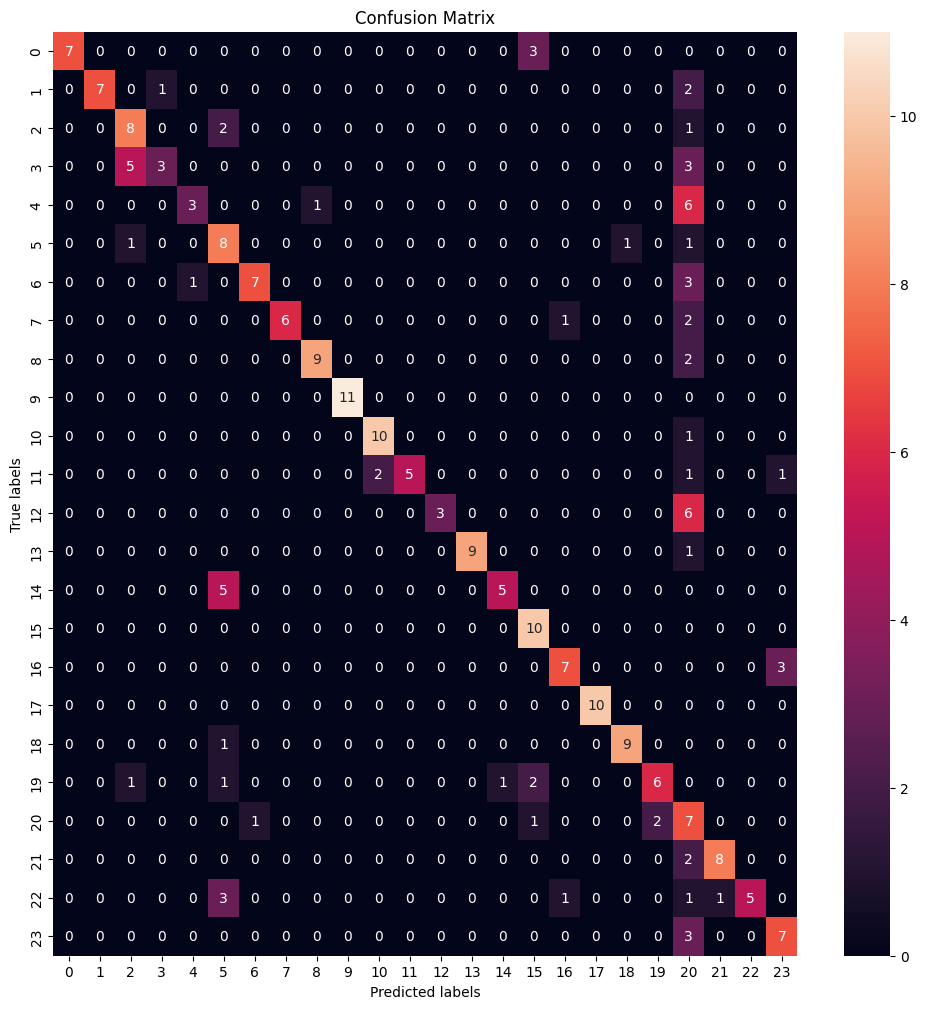

In [ ]:
report(y_test_dtc,y_pred_dtc)

Using SVM model for prediction of summarirized text

In [ ]:
y_pred_svm = svm.predict(test_summarized_v)
print(y_pred_svm)

y_test_svm= newDf['label_int'].tolist()


[15 15 15 15 15 15 15 15 15 15 17 17 17 17 17 17 17 17 17 17 16 16 16 16
 16 16 16 16 16 16  4  4  4  4  4  4  4  4  4  4 20 10 10 10 10 10 10 10
 10 10 10 20  6  6  6  6  6  6  6  6  6  6 20  8  8  8  8  8  8  8  8  8
  8 20  5  5  5  5  5 14  5  5  5  5 14 14 14 14 14 14 14 14 14 14  7  7
  7  7  7  7  7  7 20  1  1  1  1  1  1  1  1  1  1 15  0  0  0  0  0  0
  0  0 15  2  2  2  2  2  2  2  2  2  2 20  9  9  9  9  9  9  9  9  9  9
  9 20 13 13 13 13 13 13 13 13 13 20  3  3  3  3  3  3  3  3  3  3 11 11
 11 11 11 11 11 11 20 12 12 12 12 12 12 12 12 12 23 23 23 23 23 23 23 23
 23 23 18 18 18 18 18 18 18 18 18 18 21 21 21 21 21 21 21 21 21 21 20 20
 20 20 20 20 20 20 20 20 20 22 22 22 22 22 22 22 22 22 22 22 19 19 19 19
 19 19 19 19 19 19 19]


Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       1.00      1.00      1.00        10
           2       1.00      0.91      0.95        11
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00        10
           5       1.00      0.82      0.90        11
           6       1.00      0.91      0.95        11
           7       1.00      0.89      0.94         9
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00        11
          10       1.00      0.91      0.95        11
          11       1.00      0.89      0.94         9
          12       1.00      1.00      1.00         9
          13       1.00      0.90      0.95        10
          14       0.91      1.00      0.95        10
          15       0.83      1.00      0.91        10
          16       1.00      1.00      1.00        10
          17

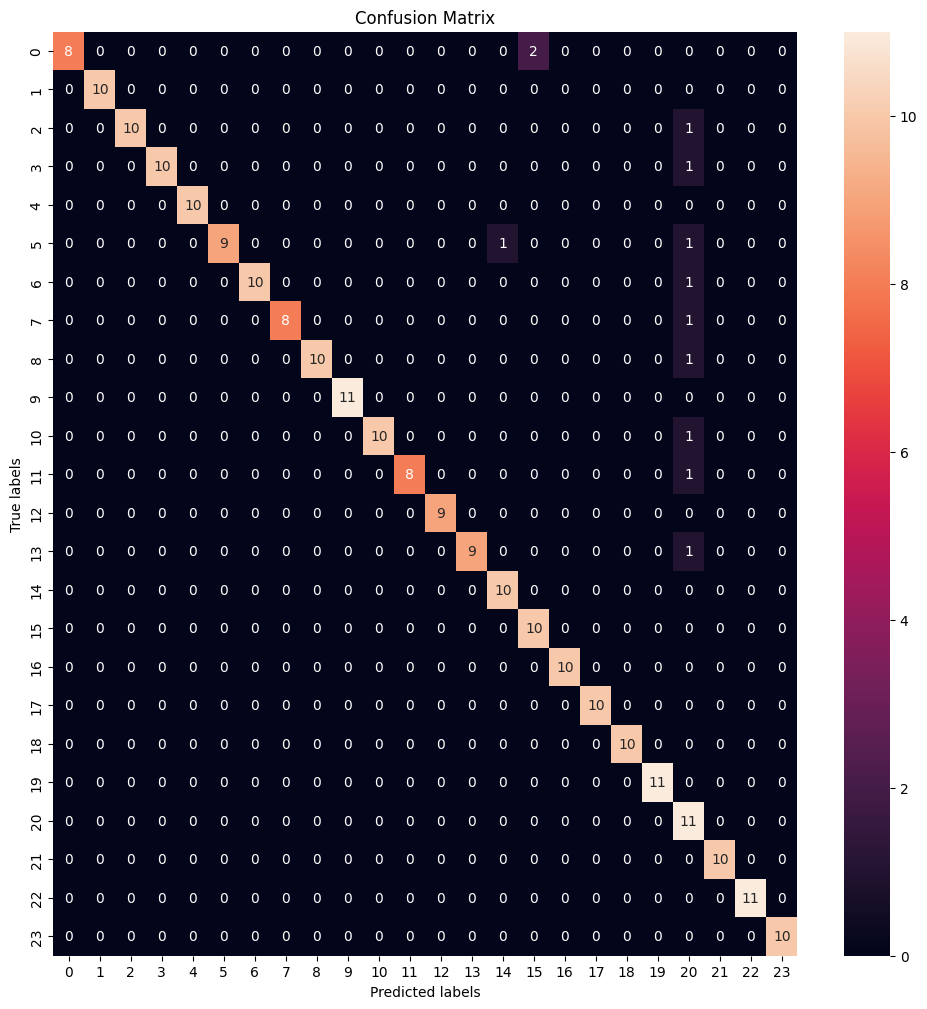

In [ ]:
report(y_test_svm,y_pred_svm)